In [1]:
import json
import numpy as np
import math

In [2]:
train_text_label = json.load(open('../data/train_text_label.json', 'r'))
test_text_label = json.load(open('../data/test_text_label.json', 'r'))
print(train_text_label[0][0])
print(train_text_label[1][0])

女生 发表 轻生 日志 获 网友 连夜 搜 救 本报 讯 永别 朋友 永别 世界 前天 晚上 清华 毕业 女生 小陈 网 主页 写下 日志 后 失踪 日志 中 表示 欲 寻短见 得知 消息 校友 途径 连夜 发起 搜 救 昨天 上午 记者 了解 民警 已经 找到 小陈 已经 危险 了解 小 陈 本科 研究生 分别 就读 中国 传媒 大学 清华大学 今年 毕业 后 进入 国家机关 下属 媒体 工作 前天 晚上 7点 44分 小陈 网 主页 发表 篇 题为 永别 朋友 日志 后 失踪 篇 日志 很快 引起 关注 当天 晚上 10点 关注 清华大学 微 博 协会 会长 刘若晴 微 博 发布 紧急 寻 人 信息 呼吁 网友 路 留 心眼 儿 救人 命 随后 网友 展开 搜 救 昨天 上午 条 寻找 小 陈 微 博 已 转发 8000 次 小陈 同学 寻 遍 宣武门 长椿 街 西单 传媒 大学 清华大学 不断 网上 交流 搜 救 信息 汇总 清华大学 微 博 协会 微 博 从前 晚 10点 昨天 凌晨 3点 小时 新 搜 救 信息 上面 发布 昨天 上午 北京市 公安局 官方 微 博 发布消息 称 北京 警方 积极 努力 开展 相关 工作 随后 市 公安局 勤务 指挥部 传来 好 消息 警方 连夜 工作 民警 丰台 六里桥 附近 找到 同学 同学 平安无事 现场 自杀 情况 危险 民警 正在 进一步 调查 中

[2, 0, 0, 2, 0, 0, 0, 0, 0]


In [3]:
word_stat = dict()
emotion_cnt = list()
for i in range(8):
    word_stat[i] = dict()
    emotion_cnt.append(0)
for text, label in zip(train_text_label[0], train_text_label[1]):
    for seg in text.split():
        if seg not in word_stat[np.argmax(label[1:])]:
            word_stat[np.argmax(label[1:])][seg] = 0
        word_stat[np.argmax(label[1:])][seg] += 1
    emotion_cnt[np.argmax(label[1:])] += 1
# word_stat[np.argmax(train_text_label[1][0][1:])] = train_text_label[0][0].split()
# len(word_stat)

In [4]:
# len(word_stat[0])
# uniq_words = set(word_stat[0])
# dic = dict()
# for w in uniq_words:
#     dic[w] = word_stat[0].count(w)

In [5]:
print(word_stat[0]['数'])
print(word_stat[1]['数'])
print(emotion_cnt)

51
17
[416, 124, 145, 984, 367, 180, 99, 27]


In [6]:
# # eord_stat and emotion cnt
# with open('wordstatDic_emocntList.json', 'w') as f:
#     json.dump([word_stat, emotion_cnt], f)

In [7]:
for i in range(8):
    toti = 0
    for freq in word_stat[i].values():
        toti += freq
    for k in word_stat[i]:
        word_stat[i][k] /= toti
    for k in word_stat[i]:
        word_stat[i][k] = math.log2(word_stat[i][k])

emotion_cnt = [math.log2(i) for i in emotion_cnt]

In [8]:
prob = 0
for v in word_stat[0].values():
    prob += v
print(prob)
print(word_stat[0]['老太'])

print(emotion_cnt)

# 1.0000000000002014
# 8.148299042574862e-05
# [416, 124, 145, 984, 367, 180, 99, 27]

-323235.1472357542
-13.58314154625341
[8.700439718141093, 6.954196310386875, 7.1799090900149345, 9.94251450533924, 8.519636252843213, 7.491853096329675, 6.6293566200796095, 4.754887502163468]


In [9]:
def bayes(factor):
    cnter = 0
    miss = 0
    for text, label in zip(test_text_label[0], test_text_label[1]):
        scores = list()
        segments = text.split()
        for i in range(8):
            # 类别不均衡，加上trade off 因子
            # score_i = emotion_cnt[i] * 2000
            # 1057
            score_i = emotion_cnt[i] * factor
            for seg in segments:
                if seg in word_stat[i]:
                    score_i += word_stat[i][seg]
            scores.append(score_i)
        if np.argmax(scores) == np.argmax(label[1:]):
            cnter += 1
    print('factor:', factor, 'cnt:', cnter, 'ratio:', cnter / len(test_text_label[1]))
    return [factor, cnter, cnter / len(test_text_label[1])]

In [10]:
list_fac, list_cnt, list_rat = list(), list(), list()
for i in range(50, 3000, 5):
    f, c, r = bayes(i)
    list_fac.append(f)
    list_cnt.append(c)
    list_rat.append(r)

factor: 50 cnt: 14 ratio: 0.0062836624775583485
factor: 55 cnt: 13 ratio: 0.0058348294434470375
factor: 60 cnt: 13 ratio: 0.0058348294434470375
factor: 65 cnt: 16 ratio: 0.00718132854578097
factor: 70 cnt: 17 ratio: 0.00763016157989228
factor: 75 cnt: 19 ratio: 0.008527827648114902
factor: 80 cnt: 21 ratio: 0.009425493716337522
factor: 85 cnt: 20 ratio: 0.008976660682226212
factor: 90 cnt: 23 ratio: 0.010323159784560144
factor: 95 cnt: 25 ratio: 0.011220825852782765
factor: 100 cnt: 26 ratio: 0.011669658886894075
factor: 105 cnt: 29 ratio: 0.013016157989228007
factor: 110 cnt: 33 ratio: 0.01481149012567325
factor: 115 cnt: 40 ratio: 0.017953321364452424
factor: 120 cnt: 44 ratio: 0.019748653500897665
factor: 125 cnt: 54 ratio: 0.02423698384201077
factor: 130 cnt: 60 ratio: 0.026929982046678635
factor: 135 cnt: 65 ratio: 0.02917414721723519
factor: 140 cnt: 73 ratio: 0.032764811490125674
factor: 145 cnt: 85 ratio: 0.0381508078994614
factor: 150 cnt: 94 ratio: 0.0421903052064632
factor: 

factor: 915 cnt: 955 ratio: 0.4286355475763016
factor: 920 cnt: 957 ratio: 0.42953321364452424
factor: 925 cnt: 957 ratio: 0.42953321364452424
factor: 930 cnt: 960 ratio: 0.43087971274685816
factor: 935 cnt: 961 ratio: 0.43132854578096946
factor: 940 cnt: 962 ratio: 0.43177737881508077
factor: 945 cnt: 963 ratio: 0.4322262118491921
factor: 950 cnt: 965 ratio: 0.43312387791741475
factor: 955 cnt: 966 ratio: 0.43357271095152605
factor: 960 cnt: 967 ratio: 0.43402154398563736
factor: 965 cnt: 968 ratio: 0.43447037701974867
factor: 970 cnt: 968 ratio: 0.43447037701974867
factor: 975 cnt: 971 ratio: 0.4358168761220826
factor: 980 cnt: 972 ratio: 0.4362657091561939
factor: 985 cnt: 972 ratio: 0.4362657091561939
factor: 990 cnt: 972 ratio: 0.4362657091561939
factor: 995 cnt: 974 ratio: 0.4371633752244165
factor: 1000 cnt: 977 ratio: 0.4385098743267504
factor: 1005 cnt: 978 ratio: 0.43895870736086173
factor: 1010 cnt: 978 ratio: 0.43895870736086173
factor: 1015 cnt: 978 ratio: 0.43895870736086

factor: 1750 cnt: 1049 ratio: 0.4708258527827648
factor: 1755 cnt: 1049 ratio: 0.4708258527827648
factor: 1760 cnt: 1049 ratio: 0.4708258527827648
factor: 1765 cnt: 1049 ratio: 0.4708258527827648
factor: 1770 cnt: 1049 ratio: 0.4708258527827648
factor: 1775 cnt: 1049 ratio: 0.4708258527827648
factor: 1780 cnt: 1049 ratio: 0.4708258527827648
factor: 1785 cnt: 1049 ratio: 0.4708258527827648
factor: 1790 cnt: 1050 ratio: 0.47127468581687615
factor: 1795 cnt: 1050 ratio: 0.47127468581687615
factor: 1800 cnt: 1050 ratio: 0.47127468581687615
factor: 1805 cnt: 1050 ratio: 0.47127468581687615
factor: 1810 cnt: 1050 ratio: 0.47127468581687615
factor: 1815 cnt: 1051 ratio: 0.47172351885098746
factor: 1820 cnt: 1051 ratio: 0.47172351885098746
factor: 1825 cnt: 1051 ratio: 0.47172351885098746
factor: 1830 cnt: 1051 ratio: 0.47172351885098746
factor: 1835 cnt: 1052 ratio: 0.47217235188509876
factor: 1840 cnt: 1052 ratio: 0.47217235188509876
factor: 1845 cnt: 1052 ratio: 0.47217235188509876
factor: 

factor: 2580 cnt: 1062 ratio: 0.47666068222621183
factor: 2585 cnt: 1062 ratio: 0.47666068222621183
factor: 2590 cnt: 1062 ratio: 0.47666068222621183
factor: 2595 cnt: 1062 ratio: 0.47666068222621183
factor: 2600 cnt: 1062 ratio: 0.47666068222621183
factor: 2605 cnt: 1062 ratio: 0.47666068222621183
factor: 2610 cnt: 1062 ratio: 0.47666068222621183
factor: 2615 cnt: 1062 ratio: 0.47666068222621183
factor: 2620 cnt: 1062 ratio: 0.47666068222621183
factor: 2625 cnt: 1062 ratio: 0.47666068222621183
factor: 2630 cnt: 1062 ratio: 0.47666068222621183
factor: 2635 cnt: 1062 ratio: 0.47666068222621183
factor: 2640 cnt: 1062 ratio: 0.47666068222621183
factor: 2645 cnt: 1062 ratio: 0.47666068222621183
factor: 2650 cnt: 1062 ratio: 0.47666068222621183
factor: 2655 cnt: 1062 ratio: 0.47666068222621183
factor: 2660 cnt: 1062 ratio: 0.47666068222621183
factor: 2665 cnt: 1062 ratio: 0.47666068222621183
factor: 2670 cnt: 1062 ratio: 0.47666068222621183
factor: 2675 cnt: 1062 ratio: 0.47666068222621183


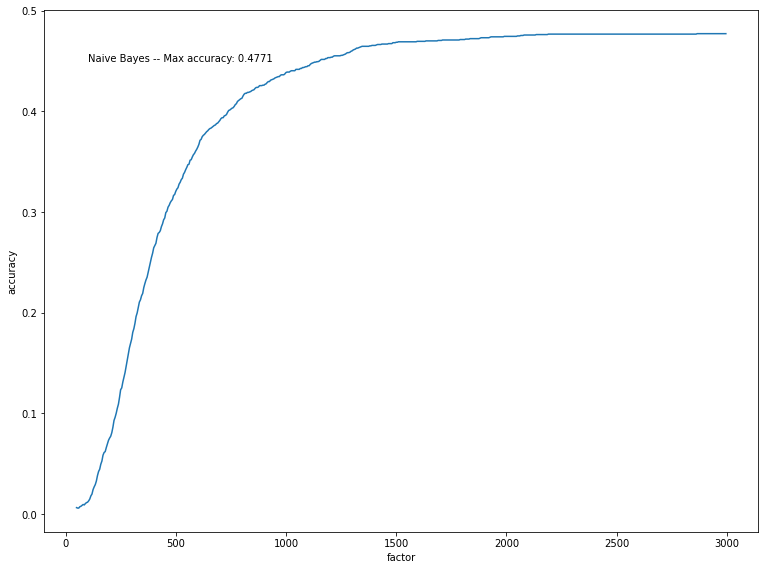

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12.8, 9.6))
plt.xlabel('factor')
plt.ylabel('accuracy')
plt.text(x=100, y=0.45, s='Naive Bayes -- Max accuracy: %.4f ' % (list_rat[-1]))
plt.plot(list_fac, list_rat)
plt.savefig('img.png')

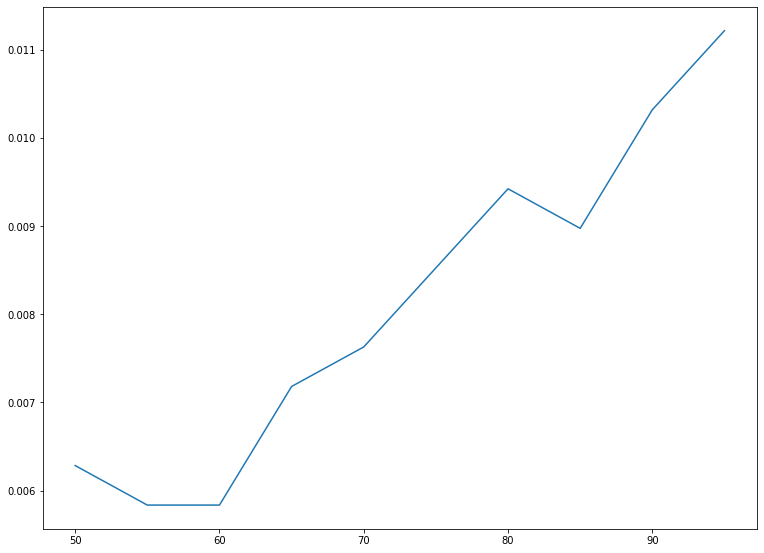

In [17]:
plt.figure(figsize=(12.8, 9.6))
plt.plot(list_fac[:10], list_rat[:10])
plt.savefig('img_pre10.png')

In [19]:
bayes(5000)

factor: 5000 cnt: 1064 ratio: 0.47755834829443444


[5000, 1064, 0.47755834829443444]

In [ ]:
# bayes(10000)